# <center>Trabajo práctico N°2</center>

Un método explícito para resolver la ecuación del calor dada por $u_t = u_{xx} + f(x,t)$, para $x \in [0, 1]$ y $t \in [0, t_F]$

In [1]:
"""
   explicit_heat

Explicit method to solve a heat equation.
# Arguments

    - `Δt::Float`: time differential step size.

    - `N::Integer`: total number of time iterations.

    - `M::Integer`: total number of nodes for `(0, 1)`.

    - `α::Int or Float`: left-side Dirichlet condition.

    - `β::Int or Float`: right-side Dirichlet condition.

    - `U0::Function`: scalar function representing an initial solution.

    - `f::Function`: Right-hand side function for the method.
# Returns

    `U::Array{Float64}`: 2D array with succesive solutions for the equation.

"""
function explicit_heat(Δt, N, M, α, β, U0, f)
    Δx = 1 / (M+1)
    r = Δt / (Δx^2)
    nodes = [i*Δx for i in 0:M+1]
    U = Array{Float64}(undef, N+1, M+2)
    U[1, :] .= U0.(nodes)
    U[:, 1] .= α
    U[:, M+2] .= β
    for n in 1:N
        for j in 2:M+1
            U[n+1, j]= r * U[n, j-1] + (1-2*r) * U[n,j] + r * U[n,j+1] + (Δt * f)
        end
    end
    return U
end

explicit_heat

In [2]:
function tent(x)
    rv = 0
    if 0 <= x <= 0.5
        rv = x
    elseif 0.5 < x <= 1
        rv = 1 - x
    end
    return rv
end

tent (generic function with 1 method)

In [3]:
using Plots

┌ Info: Saved animation to 
│   fn = /home/puff/git-repos/numerico/entregas/stable_exp_heat_h.gif
└ @ Plots /home/puff/.julia/packages/Plots/HcxwM/src/animation.jl:114


Plots.AnimatedGif("/home/puff/git-repos/numerico/entregas/stable_exp_heat_h.gif")
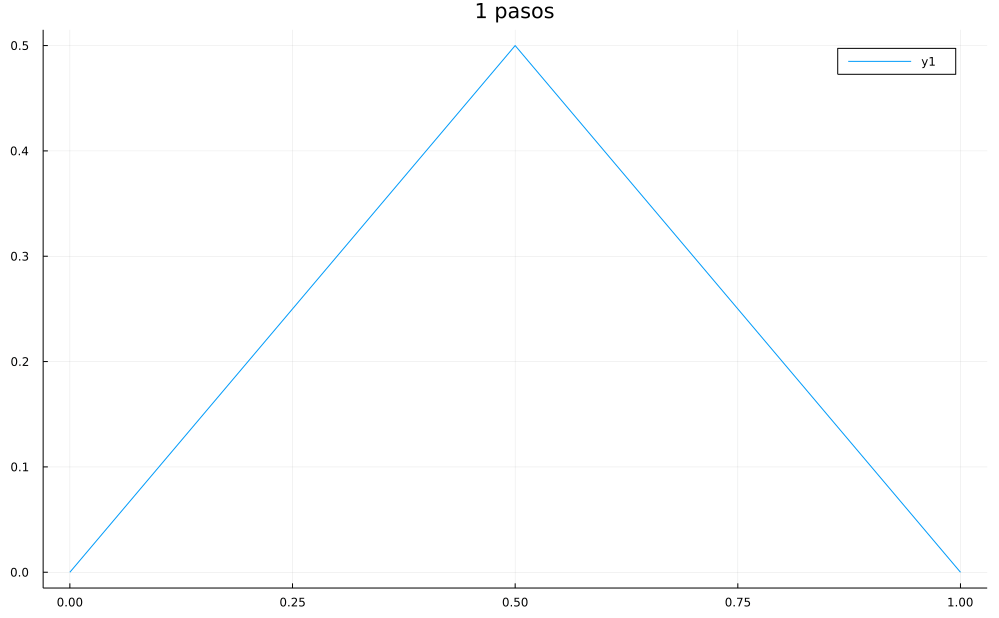

In [4]:
result = explicit_heat(0.0012, 100, 19, 0, 0, tent, 0)
Δx=0.05
dom = [j*Δx for j in 0:20]
anim = @animate for i in 1:100
    plot(dom, result[i, :], title="$i pasos", size=(999, 618))
end
gif(anim, "stable_exp_heat_h.gif", fps = 30)

┌ Info: Saved animation to 
│   fn = /home/puff/git-repos/numerico/entregas/unstable_exp_heat_h.gif
└ @ Plots /home/puff/.julia/packages/Plots/HcxwM/src/animation.jl:114


Plots.AnimatedGif("/home/puff/git-repos/numerico/entregas/unstable_exp_heat_h.gif")
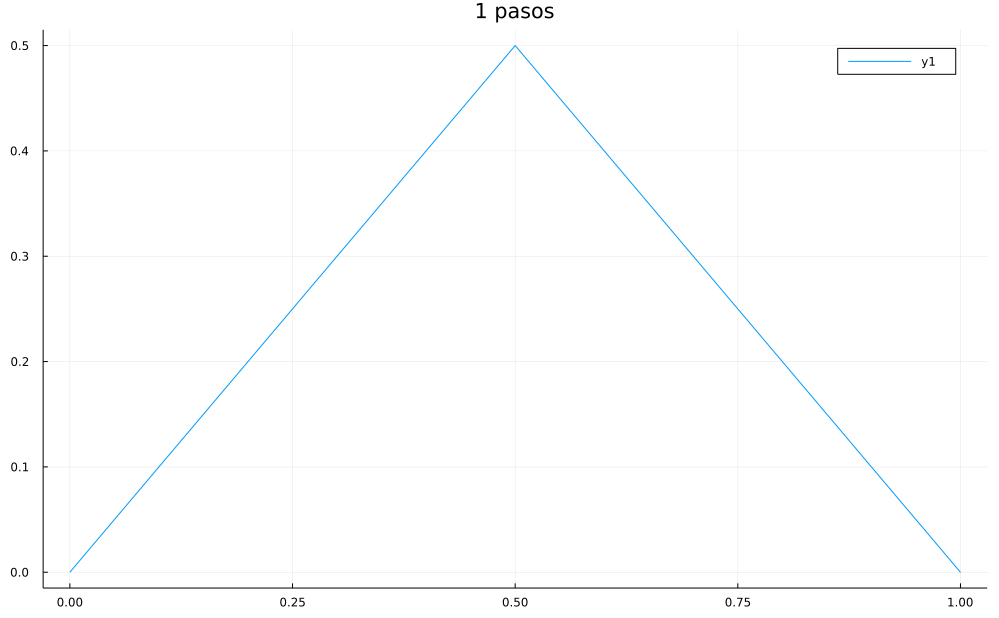

In [5]:
result = explicit_heat(0.0013, 100, 19, 0, 0, tent, 0)
Δx=0.05
dom = [j*Δx for j in 0:20]
anim = @animate for i in 1:100
    plot(dom, result[i, :], title="$i pasos", size=(999, 618))
end
gif(anim, "unstable_exp_heat_h.gif", fps = 30)

┌ Info: Saved animation to 
│   fn = /home/puff/git-repos/numerico/entregas/stable_exp_heat_p.gif
└ @ Plots /home/puff/.julia/packages/Plots/HcxwM/src/animation.jl:114


Plots.AnimatedGif("/home/puff/git-repos/numerico/entregas/stable_exp_heat_p.gif")
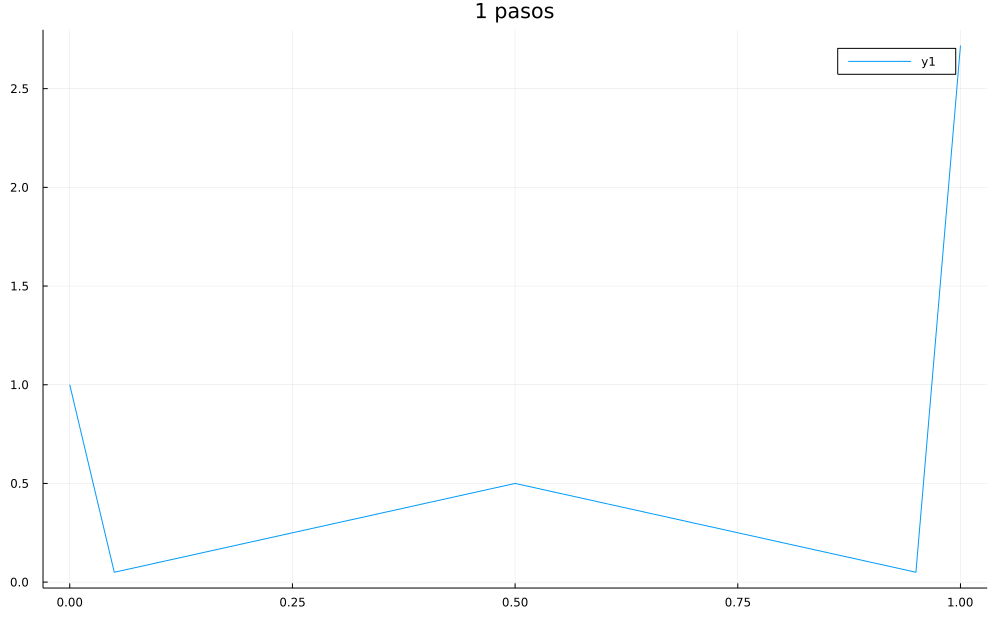

In [6]:
result = explicit_heat(0.0012, 100, 19, 1, exp(1), tent, 1)
Δx=0.05
dom = [j*Δx for j in 0:20]
anim = @animate for i in 1:100
    plot(dom, result[i, :], title="$i pasos", size=(999, 618))
end
gif(anim, "stable_exp_heat_p.gif", fps = 30)